In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.9980):
      print("Reached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallBack()

In [10]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

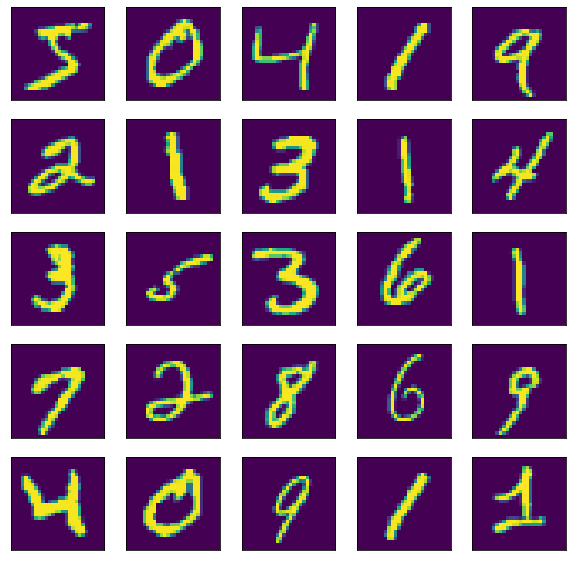

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i])
plt.show()

In [12]:
train_image = training_images.reshape(60000, 28, 28, 1)
train_image = train_image/255.0
test_image = test_images.reshape(10000, 28, 28, 1)
test_image = test_image/255.0

In [13]:
model = Sequential([
          Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1)),
          MaxPool2D(2,2),
          Flatten(),
          Dense(512, activation='relu'),
          Dense(128, activation='relu'),
          Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_image, training_labels, epochs=10, 
                    validation_data=(test_image, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 15s 8ms/step - loss: 0.1481 - accuracy: 0.9550 - val_loss: 0.0727 - val_accuracy: 0.9773
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0704 - val_accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0822 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0687 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0764 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0739 - val_accuracy: 0.9

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 23.4067 - accuracy: 0.9820 - 1s/epoch - 4ms/step


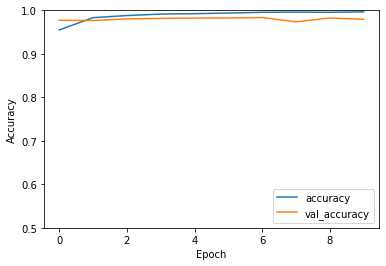

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [5]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(train_image, training_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 43s 7ms/step - loss: 0.1484 - accuracy: 0.9551
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0558 - accuracy: 0.9829
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0273 - accuracy: 0.9913
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0173 - accuracy: 0.9947
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0144 - accuracy: 0.9957
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0150 - accuracy: 0.9956
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - l

In [ ]:
#accuracy: 0.9966 Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1)), MaxPool2D(2,2)
#accuracy: 0.9948 Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1)), MaxPool2D(3,3)
#accuracy: 0.9940 Conv2D(filters=16, kernel_size=(3,3), input_shape=(28,28,1)), MaxPool2D(2,2)
#accuracy: 0.9968 Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1)), MaxPool2D(2,2)
#accuracy: 0.9955 Conv2D(filters=128, kernel_size=(3,3), input_shape=(28,28,1)), MaxPool2D(2,2)
#accuracy: 0.9930 Conv2D(filters=64, kernel_size=(2,2), input_shape=(28,28,1)), MaxPool2D(2,2)
#accuracy: 0.9948 Conv2D(filters=64, kernel_size=(5,5), input_shape=(28,28,1)), MaxPool2D(2,2)
#accuracy: 0.9968 Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1)), MaxPool2D(2,2) #2ndRun